In [1]:
# Criado por Joelson Antônio dos Santos em 04 de Janeiro de 2019.
# Préprocessamento de dados do Bovespa disponibilizados no site: https://goo.gl/QNwqJN 
# Notebook em criação. Até o momento, o código abaixo é uma transformação de dados 
# não estruturados em dados estruturados. O próximo passo será apresentar análises 
# estatísticas dos mesmos (Soon!).

import numpy as np
import pandas as pd

path = "COTAHIST_A"
dataset = pd.read_csv(path + "2003.TXT") # exemplo de dataset "não estruturado" (arquivo no repositório)
# abre arquivo para escrita (linha a linha dos dados estruturados)
file  = open('output_2003.csv', 'w')
file.write(" ".join(str(x) for x in ['id', 'tipReg', 'dataPreg', 'codBdi', 'codNeg'
                          'tpMerc', 'nomRes', 'espPap', 'prazoT', 'modRef',
                          'preAbe', 'preMax', 'preMin', 'preMed', 'preUlt',
                          'preOfc', 'preOfv', 'totNeg', 'quaTot', 'volTot',
                          'preExe', 'indopc', 'datVen', 'fatCot', 'ptoExe',
                          'codIsi', 'disMes']))
file.write("\n")
for line in range(0, len(dataset)):
    string = " ".join(str(x) for x in dataset.iloc[line].str.split(" ")[0])
    tipReg = string[0:2]
    dataPreg = string[2:10]
    codBdi = string[10:12]
    codNeg = string[12:24]
    tpMerc = string[24:27]
    nomRes = string[27:39]
    nomRes = '_'.join(nomRes.split())
    espPap = string[39:49]
    espPap = '_'.join(espPap.split())
    if ' ' not in string[49:52]:
        prazoT = string[49:52]
    else:
        prazoT = '0'
    #prazoT = string[49:52]
    modRef = string[52:56]
    preAbe = string[56:69]
    preMax = string[69:82]
    preMin = string[82:95]
    preMed = string[95:108]
    preUlt = string[108:121]
    preOfc = string[121:134]
    preOfv = string[134:147]
    totNeg = string[147:152]
    quaTot = string[152:170]
    volTot = string[170:188]
    preExe = string[188:201]
    indopc = string[201:202]
    datVen = string[202:210]
    fatCot = string[210:217]
    ptoExe = string[217:230]
    codIsi = string[230:242]
    disMes = string[242:245]
    L = [tipReg, dataPreg, codBdi, codNeg, tpMerc, nomRes, espPap, prazoT, modRef, preAbe, preMax, preMin, preMed, preUlt, preOfc, preOfv, totNeg, quaTot, volTot, preExe, indopc, datVen, fatCot, ptoExe, codIsi, disMes]
    row = ' '.join(str(x) for x in L)
    row = ' '.join(row.split())
    file.write(row + "\n")
file.close()
# abre arquivo criado (dados estruturados)
df = pd.read_csv('output_2003.csv', sep=" ", low_memory=False)

In [2]:
display(df.columns)

Index(['id', 'tipReg', 'dataPreg', 'codBdi', 'codNegtpMerc', 'nomRes',
       'espPap', 'prazoT', 'modRef', 'preAbe', 'preMax', 'preMin', 'preMed',
       'preUlt', 'preOfc', 'preOfv', 'totNeg', 'quaTot', 'volTot', 'preExe',
       'indopc', 'datVen', 'fatCot', 'ptoExe', 'codIsi', 'disMes'],
      dtype='object')

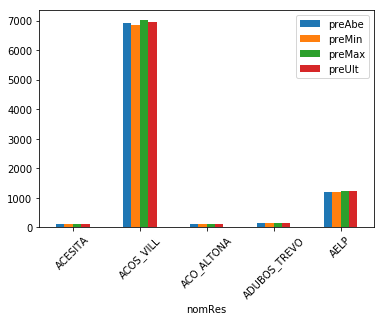

In [63]:
cluster_means = (df.groupby(['nomRes'], as_index=False).mean()
                 .groupby('nomRes')['preAbe', 'preMin', 'preMax', 'preUlt'].mean()).dropna()
# exemplo de plot com relação aos preços de abertura, preços mínimos, máximos e de fechamento 
# de algumas empresas (seis primeiras do conjunto de dados)
ax = cluster_means[1:6:].plot.bar(rot=45)